In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from keras import initializers
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#Import dataset
data2 =pd.read_csv(r"C:\LuLu\Machine Learning\ML ass 2\DataSet\income.csv",names = ['Age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'mstatus',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hoursperweek', 'ncountry', 'income'])

#Take the first 10000 datasamples for this project
data2=data2.iloc[0:10000,:]


print(data2.shape)

#this dataset has 32562 data points and 15 features

#Missing value
data2.dropna(axis=0)

#get income
data=data2

#data['income_1'] = np.where(data['income']=='<=50K', 1, 0)
#data

(10000, 15)


Drop income

In [3]:
ydata=data2['income']

data2=data2[['Age', 'workclass', 'education', 'educationnum', 'mstatus',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hoursperweek', 'ncountry']]



In [4]:
#turn data into categorical
def categorical(column):
    data2[column]=pd.Categorical(data2[column])
    
categorical('workclass')
categorical("education")
categorical("sex")
categorical("mstatus")
categorical("occupation")
categorical("relationship")
categorical("race")
categorical("ncountry")
#categorical("income")

#dummeies


dfDummies = pd.get_dummies(data2['workclass'], prefix = 'workclass')
data2 = pd.concat([data2, dfDummies], axis=1)

dfDummies = pd.get_dummies(data2['sex'], prefix = 'sex')
data2 = pd.concat([data2, dfDummies], axis=1)
    
dfDummies = pd.get_dummies(data2['education'], prefix = 'education')
#data2 = pd.concat([data2, dfDummies], axis=1)


dfDummies = pd.get_dummies(data2['occupation'], prefix = 'occupation')
data2 = pd.concat([data2, dfDummies], axis=1)
                           
dfDummies = pd.get_dummies(data2['relationship'], prefix = 'relationship')
#data2 = pd.concat([data2, dfDummies], axis=1)        

dfDummies = pd.get_dummies(data2['race'], prefix = 'race')
data2 = pd.concat([data2, dfDummies], axis=1)

dfDummies = pd.get_dummies(data2['mstatus'], prefix = 'mstatus')
data2 = pd.concat([data2, dfDummies], axis=1)
                           
dfDummies = pd.get_dummies(data2['ncountry'], prefix ='ncountry')
data2 = pd.concat([data2, dfDummies], axis=1)

#dfDummies = pd.get_dummies(data2['income'], prefix = 'income')
#data2 = pd.concat([data2, dfDummies], axis=1)

data2.shape


#Drop the original string 
data2 = data2.drop(['sex','race','education','workclass','mstatus','ncountry','occupation','relationship'], axis=1)



C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
data2 = scaler.fit_transform(data2)
data2 = scaler.fit_transform(data2)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
data2=pd.DataFrame(data2)

Clustering-K-Means

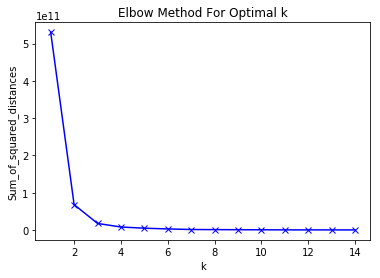

In [10]:
#Elbow method to choose the optimal K

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data2)
    Sum_of_squared_distances.append(km.inertia_)

    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [19]:
#fit the data on train(incuding target)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data2)

#learn the labels
km_labels = kmeans.predict(data2)
#data2['clusters'] = km_labels

#to see the labels

print(kmeans.labels_)



centroids = kmeans.cluster_centers_
print(centroids)


[1 1 1 ... 1 1 0]
[[ 2.72709520e-01  6.02507330e-01  6.07315142e-03  1.22356412e-02
   3.63292542e-01  8.09827116e-02  2.57810130e-02  7.91628753e-02
   6.07153217e-18  7.20655141e-01  1.36487716e-02  3.48801941e-02
   4.45859873e-02  3.03306036e-04  1.00000000e+00 -1.42108547e-14
   8.09827116e-02  2.42644829e-01  1.21430643e-17  2.24446466e-02
   9.91810737e-02  6.36942675e-03  1.51653018e-02  5.36851683e-02
   1.66211708e-01  1.30421595e-02  1.34364574e-01  5.15620261e-03
   1.18895966e-01  3.45768881e-02  7.27934486e-03  1.33454656e-02
   3.24537458e-02  1.39824082e-01  9.40248711e-03  8.04974219e-01
   2.51744010e-01  1.21322414e-03  1.57415833e-01  1.81983621e-02
   4.38580528e-01  6.12678192e-02  7.15802244e-02  1.42553837e-02
   3.03306036e-04  3.94297847e-03  3.33636639e-03  1.21322414e-03
   4.85289657e-03  3.03306036e-03  9.09918107e-04  2.42644829e-03
   3.03306036e-03  6.06612072e-04  6.36942675e-03  3.03306036e-04
   2.42644829e-03  1.51653018e-03  1.21322414e-03  3.03306

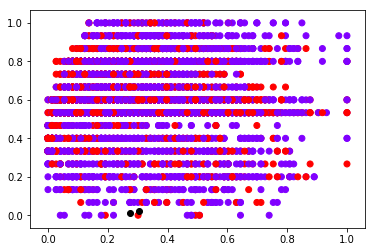

In [35]:
plt.scatter(data2[:,0],data2[:,1], c=kmeans.labels_, cmap='rainbow') 

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,3], color='black')  


Clustering-Expectation Maximization

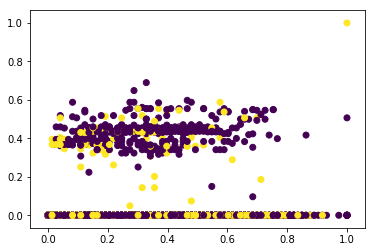

In [35]:
#get train 1 as a data frame
gmmd=data2


# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 2 Gaussian Distribution
gmm = GMM(n_components=2).fit(gmmd)

#assign a label to each sample
em_labels = gmm.predict(gmmd)

plt.scatter(gmmd[:, 0], gmmd[:, 3], c=labels, cmap='viridis')


Dimensionality Reduction-Feature Selection (Random Forest and Forward Selection)

Feature ranking:
1. feature 0 (0.224068)
2. feature 1 (0.126212)
3. feature 4 (0.122937)
4. feature 38 (0.108598)
5. feature 2 (0.079229)
6. feature 40 (0.044829)
7. feature 20 (0.031167)
8. feature 3 (0.026559)
9. feature 26 (0.025556)
10. feature 14 (0.014412)
11. feature 36 (0.013155)
12. feature 15 (0.012409)
13. feature 9 (0.010348)
14. feature 10 (0.010153)
15. feature 24 (0.009704)
16. feature 11 (0.008946)
17. feature 81 (0.007884)
18. feature 35 (0.007816)
19. feature 28 (0.007429)
20. feature 19 (0.006544)
21. feature 7 (0.006199)
22. feature 29 (0.006104)
23. feature 21 (0.005758)
24. feature 6 (0.005753)
25. feature 33 (0.005324)
26. feature 17 (0.005235)
27. feature 23 (0.005040)
28. feature 12 (0.004953)
29. feature 30 (0.004613)
30. feature 22 (0.004072)
31. feature 43 (0.004002)
32. feature 32 (0.003566)
33. feature 41 (0.003502)
34. feature 68 (0.002996)
35. feature 42 (0.002888)
36. feature 27 (0.002855)
37. feature 45 (0.002250)
38. feature 5 (0.001971)
39. feature 3

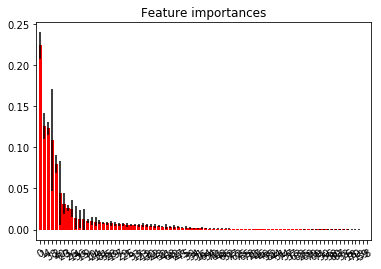

In [30]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(data2, ydata)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data2.shape[1]):
       print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data2.shape[1]), indices,rotation=30)
plt.xlim([-1, data2.shape[1]])
#plt.setp(.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [35]:
#Get the first 25 features

#fsdata=data2.iloc[:,0,1]

fsdata=data2.iloc[:,[0,1,4,38,2,40,20,3,26,14,36,15,9,10,24,11,81,35,28,19,7,29,21,6,33]]

fsdata.shape


(10000, 25)

Dimensionality Reduction-PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(data2)
#principalDf = pd.DataFrame(data = principalComponents
 #            , columns = ['principal component 1', 'principal component 2'])

pca.explained_variance_ratio_

array([0.19631176, 0.10100569, 0.08596204, 0.06348778])

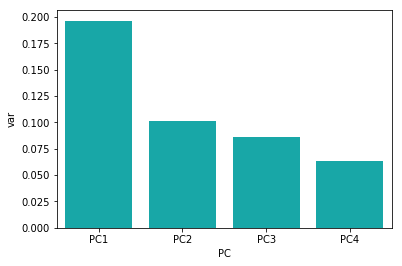

In [74]:
pca.explained_variance_ratio_

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

Dimensionality Reduction-ICA

In [13]:
from sklearn.decomposition import FastICA

# compute ICA
ica = FastICA(n_components=6)
S_ = ica.fit_transform(data2)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix

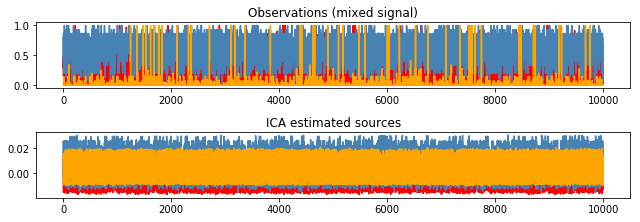

In [93]:
plt.figure(figsize=(9, 6))

models = [data2, S_]
names = ['Observations (mixed signal)',
        
         'ICA estimated sources'
        ]
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

Dimensionality Reduction-Randomized Projections

In [14]:
from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection(n_components=20, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(data2)

srp_results_train

array([[ 0.        ,  0.        , -0.67694724, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67694724,  0.        , -0.67694724, ...,  0.        ,
        -0.67694724,  0.        ],
       [ 0.        , -0.67694724, -0.67694724, ...,  0.67694724,
        -0.67694724,  0.        ],
       ...,
       [ 0.67694724,  0.        ,  0.        , ...,  0.        ,
         0.67694724,  0.        ],
       [ 0.67694724,  0.        , -1.35389449, ...,  0.67694724,
        -0.67694724,  0.        ],
       [ 0.        ,  0.        , -0.67694724, ...,  0.67694724,
        -0.67694724,  0.        ]])

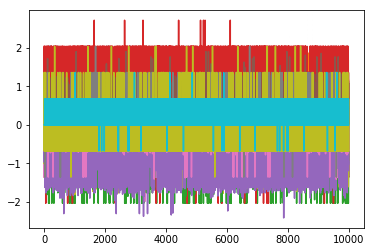

In [105]:
#plot
plt.plot(srp_results_train)

Clustering Algorithms After Applying Dimensionality Reduction

K means Clustering After Feature Selection

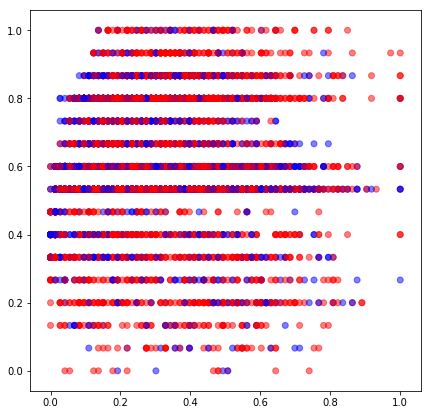

In [20]:
#Set a 3 KMeans clustering
#fsdata=fsdata.values
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(fsdata)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(fsdata[:,0],fsdata[:,1], c= label_color, alpha=0.5) 
plt.show()

K Means Clustering After PCA

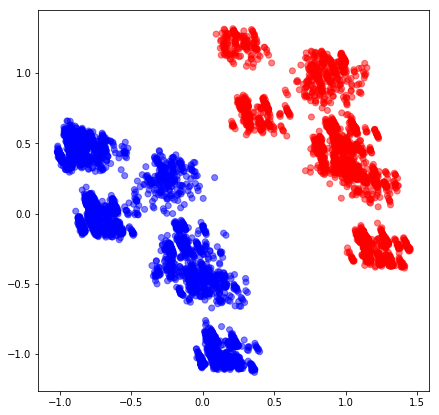

In [8]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(principalComponents)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.show()

K Means Clustering After ICA

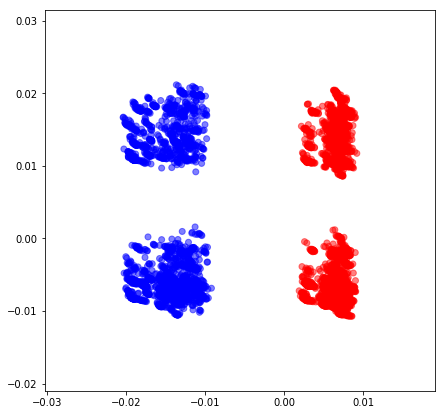

In [12]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(S_)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(S_[:,0],S_[:,1], c= label_color, alpha=0.5) 
plt.show()

K Means Clustering After Randomized Projection

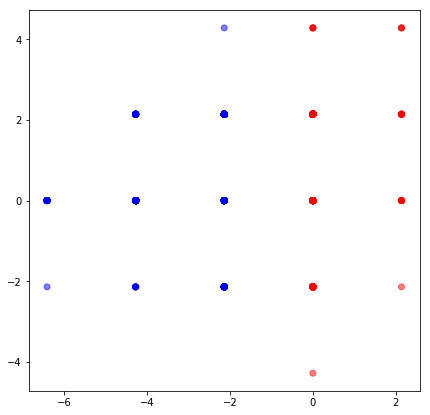

In [94]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(srp_results_train)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(srp_results_train[:,0],srp_results_train[:,1], c= label_color, alpha=0.5) 
plt.show()

EM After Feature Selection

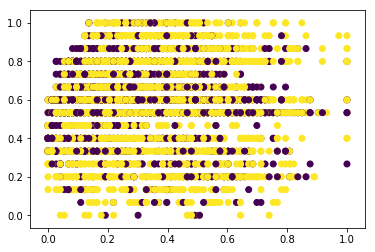

In [37]:
gmm = GMM(n_components=2).fit(fsdata)

#assign a label to each sample
labels = gmm.predict(fsdata)
#train1['labels']=labels
#d0 = gmmd[gmmd['labels']== 0] 
#d1 = gmmd[gmmd['labels']== 1]
labels

plt.scatter(fsdata[:, 0], fsdata[:, 1], c=labels, cmap='viridis')


EM After PCA

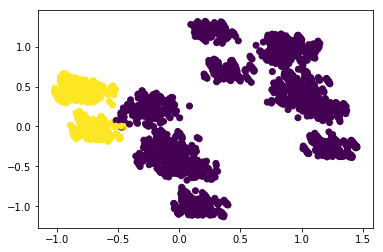

In [12]:
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 2 Gaussian Distribution
gmm = GMM(n_components=2).fit(principalComponents)

#assign a label to each sample
labels = gmm.predict(principalComponents)
#train1['labels']=labels
#d0 = gmmd[gmmd['labels']== 0] 
#d1 = gmmd[gmmd['labels']== 1]
labels

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labels, cmap='viridis')

EM After ICA

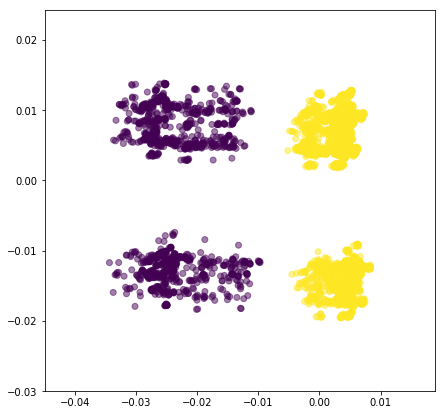

In [15]:
gmm = GMM(n_components=2).fit(S_)

#assign a label to each sample
labels = gmm.predict(S_)
#train1['labels']=labels
#d0 = gmmd[gmmd['labels']== 0] 
#d1 = gmmd[gmmd['labels']== 1]
labels

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(S_[:,0],S_[:,1], c= labels, alpha=0.5) 
plt.show()

EM After Randomized Projection

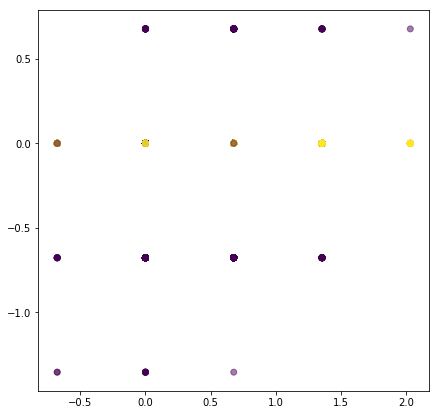

In [17]:
gmm = GMM(n_components=2).fit(srp_results_train)

#assign a label to each sample
labels_em = gmm.predict(srp_results_train)
#train1['labels']=labels
#d0 = gmmd[gmmd['labels']== 0] 
#d1 = gmmd[gmmd['labels']== 1]
labels


# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(srp_results_train[:,0],srp_results_train[:,1], c= labels_em, alpha=0.5) 
plt.show()

Neural Network After Dimensionality Reduction (Task 4

In [45]:
from keras import initializers
from keras import Sequential
from keras.layers import Dense

#I start with 2 hidden layers and 4 nodes
#ReLe will be the activiation function for hidden layer
#We will use sigmoid as activation function as it's a binary classfication problem
#node


def ann_hlayer_2(node,xtrain,ytrain,xtest,ytest):
    
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal",input_dim=2))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal"))

    #Output Layer
    classifier.add(Dense(2,activation='sigmoid',
    kernel_initializer="random_normal"))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=3)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

 
    
    return y_pred_train,y_pred

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def cal_accuracy(y_test,y_pred):
   # print("Confusion Matrix:",
    #     confusion_matrix(y_test,y_pred))
    
    print("Test Accuracy :",
            accuracy_score(y_test,y_pred)*100)
    print("Test Error rate:",
             1-(accuracy_score(y_test,y_pred)))
    
    #print("Report:",
     #     classification_report(y_test,y_pred))
    
    return 1-(accuracy_score(y_test,y_pred))

In [47]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(ydata)
encoded_Y = encoder.transform(ydata)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

y2=dummy_y


NN With Feature Selection

In [48]:
def ann_hlayer_fs(node,xtrain,ytrain,xtest,ytest):
    
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal",input_dim=25))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal"))

    #Output Layer
    classifier.add(Dense(2,activation='sigmoid',
    kernel_initializer="random_normal"))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=3)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

 
    
    return y_pred_train,y_pred


p_ann_t_fs,p_ann_fs=ann_hlayer_fs(10,fsdata,y2,fsdata,y2)

e_nn_fs=cal_accuracy(y2,p_ann_t_fs)

Epoch 1/3
10000/10000 [==============================] - 5s 473us/step - loss: 0.4570 - acc: 0.7696
Epoch 2/3
10000/10000 [==============================] - 3s 328us/step - loss: 0.3856 - acc: 0.8227
Epoch 3/3
10000/10000 [==============================] - 3s 324us/step - loss: 0.3693 - acc: 0.8283
Test Accuracy : 83.2
Test Error rate: 0.16800000000000004


NN With PCA

In [49]:
principalComponents1=principalComponents[:,[0,1]]
principalComponents1

array([[ 0.13298128, -0.44739871],
       [-0.93798328,  0.55798266],
       [-0.11872337, -0.25247469],
       ...,
       [ 0.21966228, -1.06647129],
       [-0.65299586, -0.1380811 ],
       [ 0.93879658,  0.49550364]])

In [50]:
p_ann_t_1,p_ann_1=ann_hlayer_2(10,principalComponents1,y2,principalComponents1,y2)


e_nn_pca=cal_accuracy(y2,p_ann_t_1)

Epoch 1/3
10000/10000 [==============================] - 5s 526us/step - loss: 0.4687 - acc: 0.7619
Epoch 2/3
10000/10000 [==============================] - 3s 346us/step - loss: 0.4328 - acc: 0.7621
Epoch 3/3
10000/10000 [==============================] - 5s 472us/step - loss: 0.4324 - acc: 0.7621
Test Accuracy : 76.21
Test Error rate: 0.2379


NN With ICA

In [51]:
def ann_hlayer_ica(node,xtrain,ytrain,xtest,ytest):
    
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal",input_dim=6))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal"))

    #Output Layer
    classifier.add(Dense(2,activation='sigmoid',
    kernel_initializer="random_normal"))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=3)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

 
    
    return y_pred_train,y_pred

p_ann_t_ICA,p_ann_ICA=ann_hlayer_ica(10,S_,y2,S_,y2)

e_nn_ica=cal_accuracy(y2,p_ann_t_ICA)

Epoch 1/3
10000/10000 [==============================] - 6s 577us/step - loss: 0.5594 - acc: 0.7619
Epoch 2/3
10000/10000 [==============================] - 4s 390us/step - loss: 0.5331 - acc: 0.7621
Epoch 3/3
10000/10000 [==============================] - 4s 391us/step - loss: 0.5037 - acc: 0.7621
Test Accuracy : 76.21
Test Error rate: 0.2379


NN with RP

In [55]:
def ann_hlayer_rp(node,xtrain,ytrain,xtest,ytest):
    
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal",input_dim=20))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal"))

    #Output Layer
    classifier.add(Dense(2,activation='sigmoid',
    kernel_initializer="random_normal"))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=3)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

 
    
    return y_pred_train,y_pred

p_ann_t_RP,p_ann_RP=ann_hlayer_rp(10,srp_results_train,y2,srp_results_train,y2)


e_nn_rp=cal_accuracy(y2,p_ann_t_RP)

Epoch 1/3
10000/10000 [==============================] - 5s 481us/step - loss: 0.4618 - acc: 0.7618
Epoch 2/3
10000/10000 [==============================] - 3s 305us/step - loss: 0.4101 - acc: 0.8023
Epoch 3/3
10000/10000 [==============================] - 3s 285us/step - loss: 0.4019 - acc: 0.8125
Test Accuracy : 81.16
Test Error rate: 0.1884


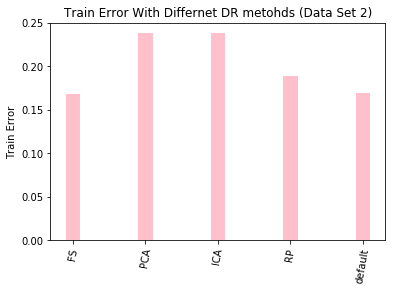

In [56]:
#plot Error rate bar chart


objects = ('FS', 'PCA',"ICA","RP","default")
y_pos = [0, 2, 4, 6,8]
performance = [e_nn_fs,e_nn_pca, e_nn_ica,e_nn_rp, 0.16862500000000002]

plt.bar(y_pos, performance, width=0.4,alpha=1,color='pink')
plt.xticks(y_pos, objects,rotation=80)

plt.ylabel('Train Error')
plt.title('Train Error With Differnet DR metohds (Data Set 2)')
 
plt.show()


Neural Network Learner with Clustering (Task 5)

NN with k means

In [57]:
def ann_hlayer_km(node,xtrain,ytrain,xtest,ytest):
    
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal",input_dim=1))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer="random_normal"))

    #Output Layer
    classifier.add(Dense(2,activation='sigmoid',
    kernel_initializer="random_normal"))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=3)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

    #check accuracy
    #print ("Accuracy of Train")
    #cal_accuracy(ytrain,y_pred_train)
    #print ("Accuracy of Test")
    #cal_accuracy(ytest,y_pred)
    
    return y_pred_train,y_pred

p_ann_t_km,p_ann_km=ann_hlayer_km(10,km_labels,y2,km_labels,y2)

ann_1_e_km=cal_accuracy(y2,p_ann_t_km)

Epoch 1/3
10000/10000 [==============================] - 5s 488us/step - loss: 0.5701 - acc: 0.7620
Epoch 2/3
10000/10000 [==============================] - 3s 309us/step - loss: 0.5332 - acc: 0.7621
Epoch 3/3
10000/10000 [==============================] - 3s 303us/step - loss: 0.5267 - acc: 0.7621
Test Accuracy : 76.21
Test Error rate: 0.2379


nn with em

In [58]:
p_ann_t_em,p_ann_c=ann_hlayer_km(10,em_labels,y2,em_labels,y2)

ann_1_e_em=cal_accuracy(y2,p_ann_t_em)

Epoch 1/3
10000/10000 [==============================] - 5s 540us/step - loss: 0.5274 - acc: 0.7617
Epoch 2/3
10000/10000 [==============================] - 3s 290us/step - loss: 0.4849 - acc: 0.7621
Epoch 3/3
10000/10000 [==============================] - 3s 287us/step - loss: 0.4839 - acc: 0.7621
Test Accuracy : 76.21
Test Error rate: 0.2379


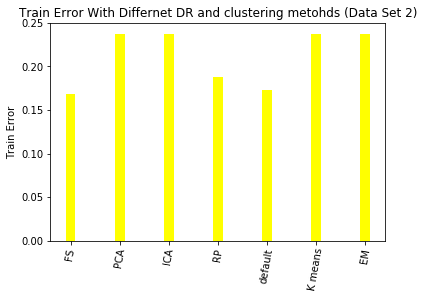

In [64]:
#plot Error rate bar chart


objects = ('FS', 'PCA',"ICA","RP","default","K means","EM")
y_pos = [0, 2, 4, 6,8,10,12]
performance = [e_nn_fs,e_nn_pca, e_nn_ica,e_nn_rp, 0.17312499999999997,ann_1_e_km,ann_1_e_em]

plt.bar(y_pos, performance, width=0.4,alpha=1,color='yellow')
plt.xticks(y_pos, objects,rotation=80)

plt.ylabel('Train Error')
plt.title('Train Error With Differnet DR and clustering metohds (Data Set 2)')
 
plt.show()